In [ ]:
import nltk
import pandas as pd
import re
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
df=pd.read_csv('movie.csv')
df.head(10)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
5,A terrible movie as everyone has said. What ma...,0
6,Finally watched this shocking movie last night...,1
7,I caught this film on AZN on cable. It sounded...,0
8,It may be the remake of 1987 Autumn's Tale aft...,1
9,My Super Ex Girlfriend turned out to be a plea...,1


In [ ]:
df.shape

(40000, 2)

In [ ]:
df = df.sample(10000)
df.reset_index(drop=True, inplace=True)
df.shape
df.head(10)

,text,label
0,I caught this movie at a small screening held ...,0
1,This movie has no respect for the viewer's tim...,0
2,"Like the previous two 'Mad Max' films, 'Mad Ma...",0
3,I feel it is my duty as a lover of horror film...,0
4,"As a fan of the old Doctor Who, and after the ...",1
5,This failed exercise in satire or commentary o...,0
6,"In this episode, Locke and Eko go searching fo...",1
7,I have read reviews of this film that found it...,1
8,In what could have been seen as a coup towards...,1
9,This movie is great. Simply. It is rare that y...,1


In [ ]:
def clean_html(text):
  clean = re.compile('<.*?>')
  return re.sub(clean,'', text)

In [ ]:
def remove_brackets(text):
  return re.sub('\[[^]]*\]','', text)

In [ ]:
def lower_cases(text):
  return text.lower()

In [ ]:
def remove_char(text):
  pattern = r'[^a-zA-Z0-9\s]'
  text = re.sub(pattern, '', text)
  return text

In [ ]:
def remove_noise(text):
  text = clean_html(text)
  text = remove_brackets(text)
  text = lower_cases(text)
  text = remove_char(text)
  return text

In [ ]:
df['text'] = df['text'].apply(remove_noise)
df.head()

,text,label
0,i caught this movie at a small screening held ...,0
1,this movie has no respect for the viewers time...,0
2,like the previous two mad max films mad max be...,0
3,i feel it is my duty as a lover of horror film...,0
4,as a fan of the old doctor who and after the m...,1


In [ ]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_words(text):
    words = word_tokenize(text)
    lemmatized_list = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    return ' '.join(lemmatized_list)

df['text'] = df['text'].apply(lemmatize_words)
df.head(10)

,text,label
0,i caught this movie at a small screen held by ...,0
1,this movie have no respect for the viewer time...,0
2,like the previous two mad max film mad max bey...,0
3,i feel it be my duty a a lover of horror film ...,0
4,a a fan of the old doctor who and after the me...,1
5,this fail exercise in satire or commentary on ...,0
6,in this episode locke and eko go search for th...,1
7,i have read review of this film that found it ...,1
8,in what could have be see a a coup towards the...,1
9,this movie be great simply it be rare that you...,1


In [ ]:
stopword_list = set(stopwords.words('english'))

custom_stopwords = {
    'movie', 'film', 'character', 'scene', 'director', 'time', 'series', 'plot',
    'story', 'actor', 'performance', 'episode', 'cast', 'watch', 'comedy', 'script',
    'man', 'woman', 'role', 'drama', 'action', 'minute', 'music', 'tv',
    'season', 'show', 'hollywood', 'cinema', 'line', 'dvd', 'screen',
    'studio', 'play', 'lead', 'feature', 'sequel', 'classic', 'dialogue', 'shot',
    'art', 'production', 'review', 'series', 'soundtrack', 'footage', 'trailer',
    'cinematography', 'background', 'special', 'effects', 'visual', 'project',
    'make', 'say', 'people', 'look', 'know', 'think', 'see', 'get',
    'go', 'take', 'come', 'use', 'find', 'give', 'work', 'try',
    'way', 'put', 'tell', 'well', 'end', 'show', 'year', 'day',
    'really', 'actually', 'quite', 'pretty', 'maybe', 'probably', 'especially',
    'exactly', 'definitely', 'almost', 'often', 'sometimes', 'usually', 'always',
    'never', 'now', 'then', 'im', 'ive', 'dont', 'thats', 'youre', 'theyre',
    'its', 'well', 'also', 'just', 'even', 'still', 'something', 'someone',
    'anything', 'everything', 'write', 'change', 'turn', 'run', 'create',
    'bring', 'start', 'stop', 'begin', 'finish', 'use', 'mean', 'thing', 'old',
    'thought', 'br', 've', '10', 'one'
}

stopword_list.update(custom_stopwords)

# removing the stopwords from review
def remove_stopwords(text):
    filtered_text = []
    # iterate over each word in the text
    for word in text.split():
        if word not in stopword_list:
            filtered_text.append(word)
    # return the filtered list of words
    return filtered_text

# Apply the remove_stopwords function to the 'text' column
df['text'] = df['text'].apply(remove_stopwords)

# join back all words as single paragraph
def join_back(text):
    return ' '.join(text)

# Apply join_back function to rejoin words in each row
df['text'] = df['text'].apply(join_back)

df.head(100)


,text,label
0,caught small held member college game club for...,0
1,respect viewer 15 stretch 95 order achieve slo...,0
2,like previous two mad max mad max beyond thund...,0
3,feel duty lover horror warm horrible bad horro...,0
4,fan doctor mediocre fox dubious new doctor cha...,1
...,...,...
95,maya without interest dream life away wonder f...,0
96,sorry leave impression commando fought zombie ...,0
97,add aspect moviethe dance sing actingthe stand...,1
98,advent child twice storyline isnt shallow majo...,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2000)

X_tfidf = tfidf.fit_transform(df['text']).toarray()

feature_names = tfidf.get_feature_names_out()

tfidf_df = pd.DataFrame(X_tfidf, columns=feature_names)

print(tfidf_df.head())

   100  1010   12        15  1950s  1970s   20   25   30   40  ...       yes  \
0  0.0   0.0  0.0  0.000000    0.0    0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1  0.0   0.0  0.0  0.131479    0.0    0.0  0.0  0.0  0.0  0.0  ...  0.000000   
2  0.0   0.0  0.0  0.000000    0.0    0.0  0.0  0.0  0.0  0.0  ...  0.000000   
3  0.0   0.0  0.0  0.000000    0.0    0.0  0.0  0.0  0.0  0.0  ...  0.000000   
4  0.0   0.0  0.0  0.000000    0.0    0.0  0.0  0.0  0.0  0.0  ...  0.062568   

   yet  york  youd  youll     young  youth    youve  zero  zombie  
0  0.0   0.0   0.0    0.0  0.073422    0.0  0.00000   0.0     0.0  
1  0.0   0.0   0.0    0.0  0.000000    0.0  0.12489   0.0     0.0  
2  0.0   0.0   0.0    0.0  0.000000    0.0  0.00000   0.0     0.0  
3  0.0   0.0   0.0    0.0  0.000000    0.0  0.00000   0.0     0.0  
4  0.0   0.0   0.0    0.0  0.000000    0.0  0.00000   0.0     0.0  

[5 rows x 2000 columns]


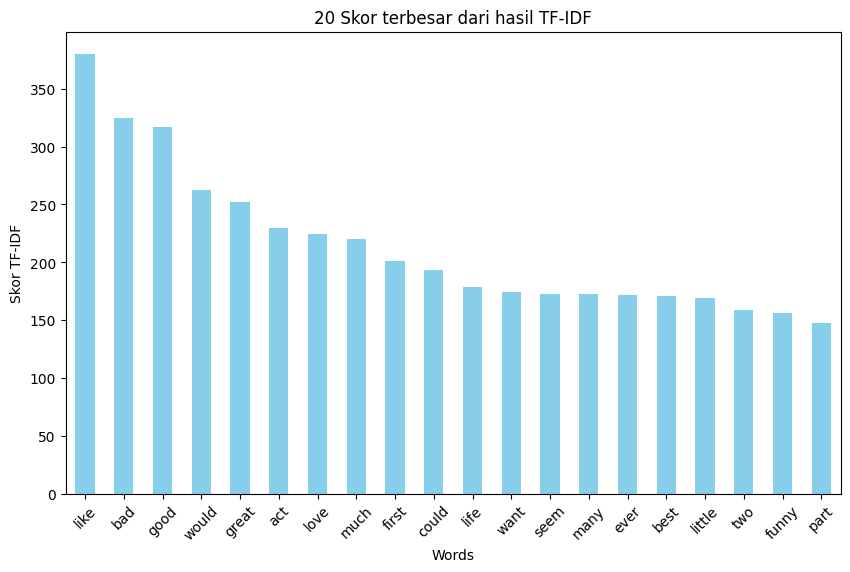

like      380.435290
bad       324.300647
good      317.350767
would     262.077222
great     252.446855
act       229.582583
love      224.770125
much      219.867272
first     200.671449
could     193.423118
life      178.594823
want      174.203441
seem      172.513864
many      172.493726
ever      171.853974
best      170.800439
little    169.031994
two       159.000744
funny     156.236667
part      147.898141
dtype: float64

In [ ]:
import matplotlib.pyplot as plt
tfidf_sorted = tfidf_df.sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
tfidf_sorted.plot(kind='bar', color='skyblue')
plt.title('20 Skor terbesar dari hasil TF-IDF')
plt.ylabel('Skor TF-IDF')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.show()

tfidf_sorted.head(200)

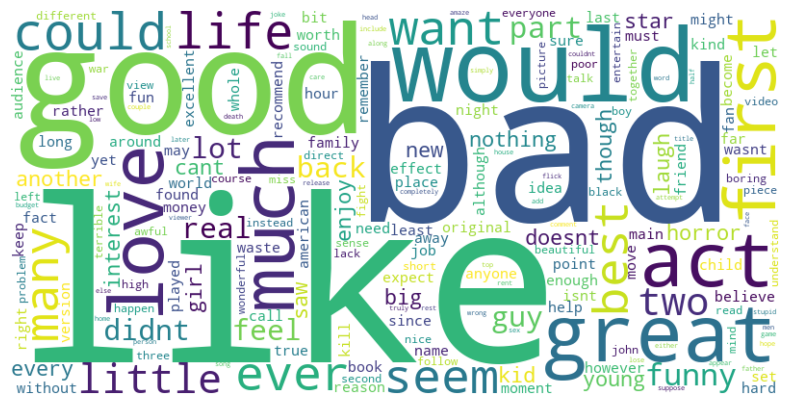

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_scores = tfidf_df.sum().sort_values(ascending=False)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

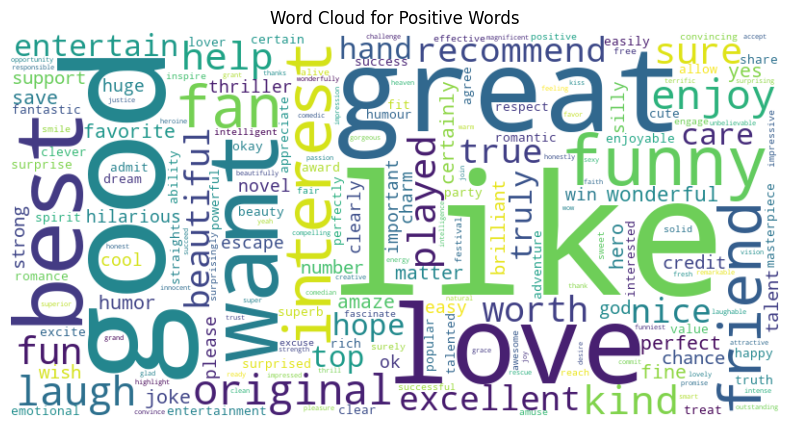

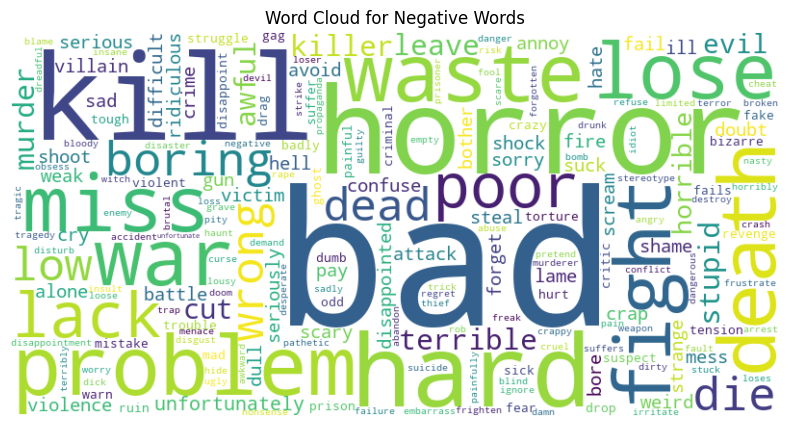

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Inisialisasi Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Dua dictionary untuk menyimpan kata positif dan negatif beserta skornya
positive_words = {}
negative_words = {}

# Loop untuk setiap teks yang sudah diproses
for text in df['text']:
    words = text.split()
    for word in words:
        # Skor sentimen untuk setiap kata
        score = sia.polarity_scores(word)
        # Jika kata memiliki sentimen positif yang tinggi
        if score['pos'] > 0.5:
            if word in positive_words:
                positive_words[word] += score['pos']  # Tambahkan skor positif ke kata yang ada
            else:
                positive_words[word] = score['pos']  # Tambahkan kata baru ke dictionary positif
        # Jika kata memiliki sentimen negatif yang tinggi
        elif score['neg'] > 0.5:
            if word in negative_words:
                negative_words[word] += score['neg']  # Tambahkan skor negatif ke kata yang ada
            else:
                negative_words[word] = score['neg']  # Tambahkan kata baru ke dictionary negatif

# Word cloud untuk kata-kata positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Words')
plt.show()

# Word cloud untuk kata-kata negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Words')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
y = df['label']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
# Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Predict on the test set
y_pred = nb_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8495

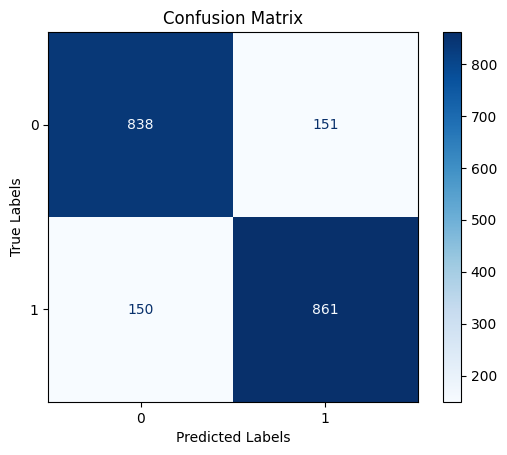

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])

# Print the classification report
print(report)

              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85       989
    Positive       0.85      0.85      0.85      1011

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [ ]:
def classify_review(review):
    # Preprocess the review
    review_cleaned = remove_noise(review)
    review_lemmatized = lemmatize_words(review_cleaned)
    review_no_stopwords = remove_stopwords(review_lemmatized)

    # Join the words back into a single string after removing stopwords
    review_joined = ' '.join(review_no_stopwords)

    # Transform the review using the trained TF-IDF vectorizer
    review_tfidf = tfidf.transform([review_joined]).toarray()

    # Predict sentiment using the Naive Bayes model
    prediction = nb_model.predict(review_tfidf)

    # Return the predicted class
    return 'Positive' if prediction[0] == 1 else 'Negative'

In [ ]:
# Testing negative review
classify_review("Ashiap Man is a very horrible and boring movie")

'Negative'

In [ ]:
# Testing negative review
classify_review("This movie was a huge disappointment. The plot was messy and lacked any real direction, making it hard to stay interested. The characters were poorly developed, and the acting felt flat and uninspired. The dialogue was cringeworthy at times, with forced humor that didn’t land. The pacing was incredibly slow, and by the time anything exciting happened, I had already lost interest. Even the special effects, which I had hoped would redeem the film, were subpar. Overall, it was a forgettable experience and a waste of time")

'Negative'

In [ ]:
# Testing positive review
classify_review("Rafathar the movie was an underrated masterpiece")

'Positive'

In [ ]:
# Testing positive review
classify_review("The movie was a visual masterpiece, with stunning cinematography and exceptional performances from the cast. The director did a brilliant job of balancing the emotional depth of the characters with the fast-paced action scenes. The storyline, though predictable at times, was engaging enough to keep me hooked throughout. However, the ending felt a bit rushed and left some plot points unresolved. Overall, it’s a must-watch for fans of the genre, offering a perfect mix of drama, suspense, and heartwarming moments.")

'Positive'

In [ ]:
classify_review("Sofia the first is the best movie i have ever seen on my life")

'Positive'

In [ ]:
classify_review("this movie is so good i want to leave the cinema early and cry myself to sleep and build a better civilazation")

'Negative'